In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv("PubMed Multi Label Text Classification Dataset.csv", encoding='utf-8', engine='python')
print(data.head(5))

                                               Title  \
0  Expression of p53 and coexistence of HPV in pr...   
1  Vitamin D status in pregnant Indian women acro...   
2  [Identification of a functionally important di...   
3  Multilayer capsules: a promising microencapsul...   
4  Nanohydrogel with N,N'-bis(acryloyl)cystine cr...   

                                        abstractText  \
0  Fifty-four paraffin embedded tissue sections f...   
1  The present cross-sectional study was conducte...   
2  The occurrence of individual amino acids and d...   
3  In 1980, Lim and Sun introduced a microcapsule...   
4  Substantially improved hydrogel particles base...   

                                           meshMajor      pmid  \
0  ['DNA Probes, HPV', 'DNA, Viral', 'Female', 'H...   8549602   
1  ['Adult', 'Alkaline Phosphatase', 'Breast Feed...  21736816   
2  ['Amino Acid Sequence', 'Analgesics, Opioid', ...  19060934   
3  ['Acrylic Resins', 'Alginates', 'Animals', 'Bi...  11426874

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 22 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Title         9999 non-null   object
 1   abstractText  10000 non-null  object
 2   meshMajor     10000 non-null  object
 3   pmid          10000 non-null  int64 
 4   meshid        10000 non-null  object
 5   meshroot      10000 non-null  object
 6   A             10000 non-null  int64 
 7   B             10000 non-null  int64 
 8   C             10000 non-null  int64 
 9   D             10000 non-null  int64 
 10  E             10000 non-null  int64 
 11  F             10000 non-null  int64 
 12  G             10000 non-null  int64 
 13  H             10000 non-null  int64 
 14  I             10000 non-null  int64 
 15  J             10000 non-null  int64 
 16  K             10000 non-null  int64 
 17  L             10000 non-null  int64 
 18  M             10000 non-null  int64 
 19  N    

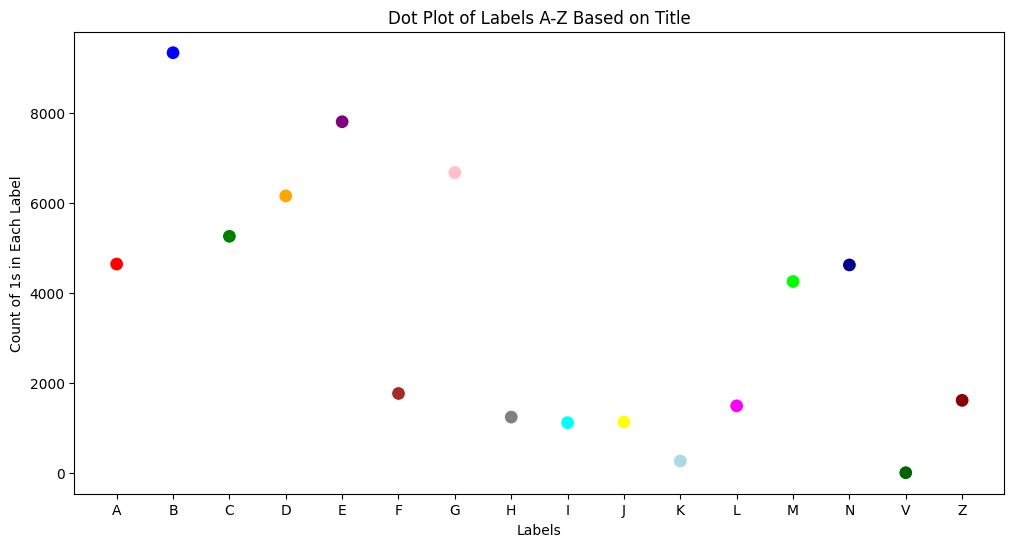

In [4]:

# Labels A to Z for multi-class classification
labels = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'V', 'Z']

# Count the occurrences of '1' for each label (multi-label classification)
label_counts = {label: data[label].sum() for label in labels}

# Prepare data for plotting (number of dots)
values = [label_counts[label] for label in labels]

# Assign colors for each label
colors = ['red', 'blue', 'green', 'orange', 'purple', 'brown', 'pink', 'grey', 'cyan', 'yellow', 
          'lightblue', 'magenta', 'lime', 'darkblue', 'darkgreen', 'darkred']

# Plot the dot graph
plt.figure(figsize=(12, 6))
sns.scatterplot(x=labels, y=values, hue=labels, palette=colors, s=100, marker='o', legend=False)

plt.title('Dot Plot of Labels A-Z Based on Title')
plt.xlabel('Labels')
plt.ylabel('Count of 1s in Each Label')
plt.show()


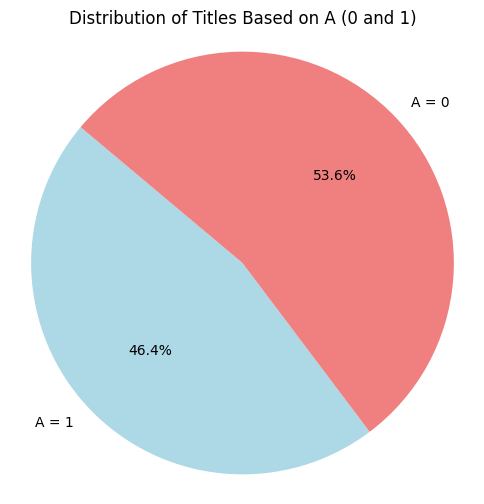

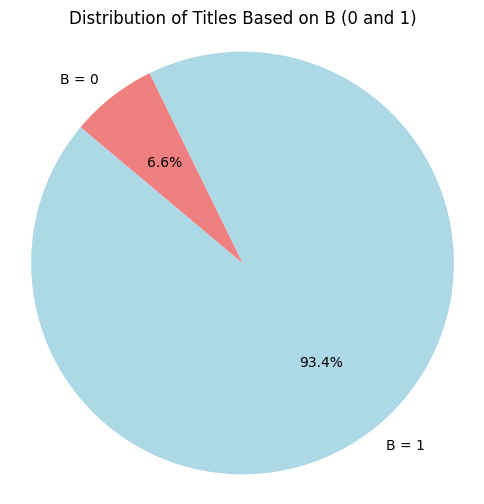

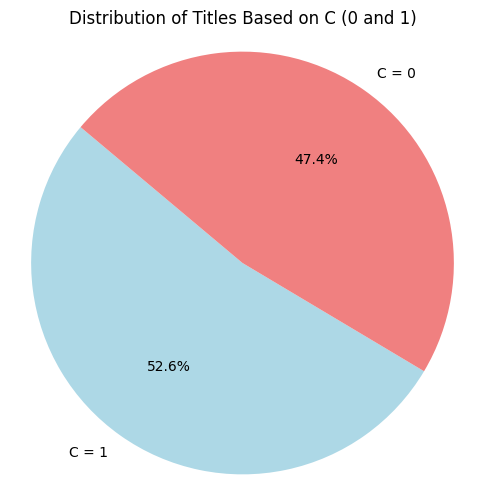

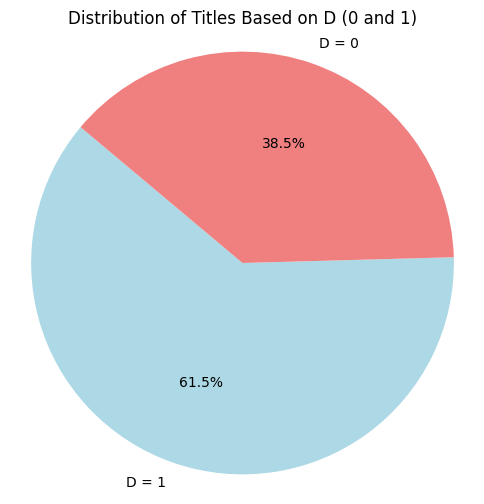

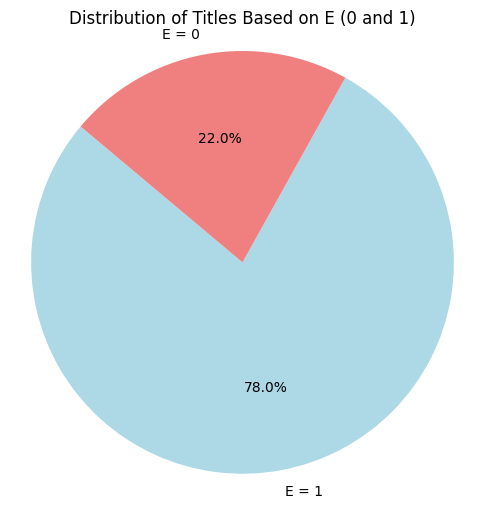

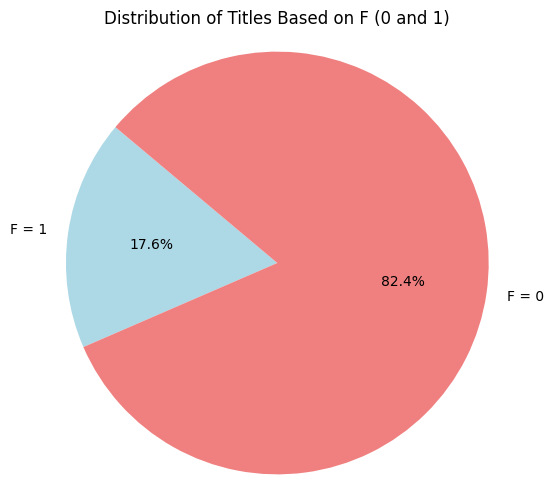

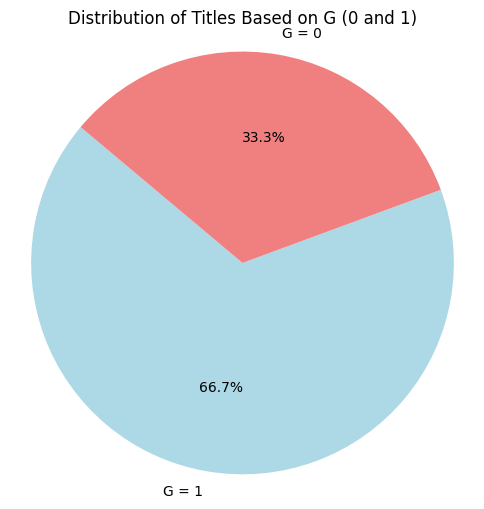

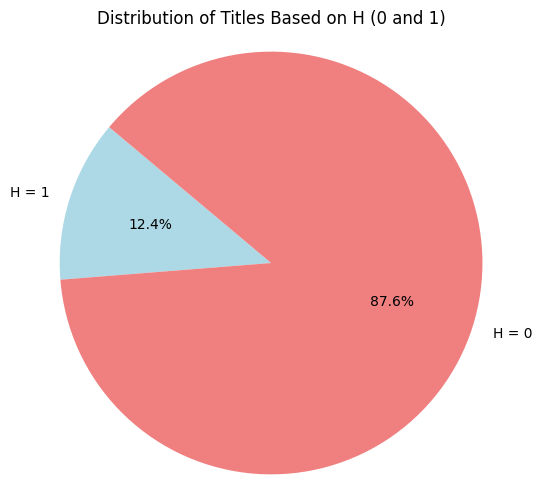

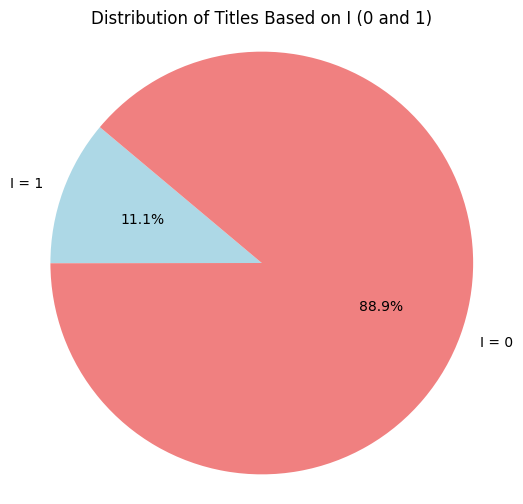

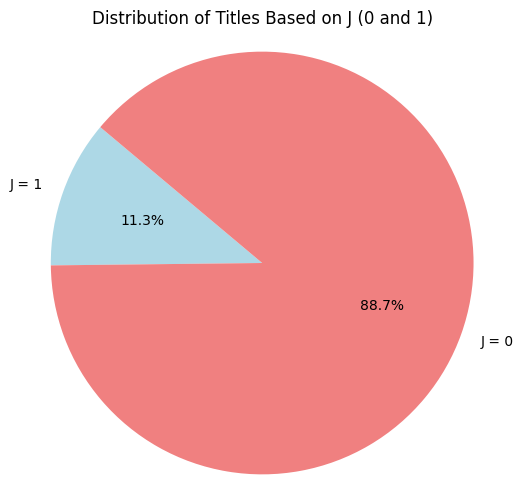

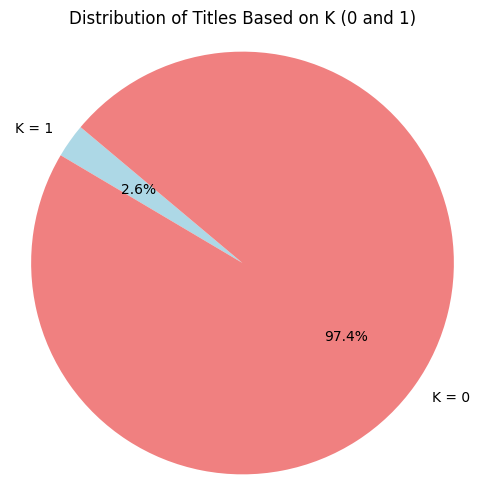

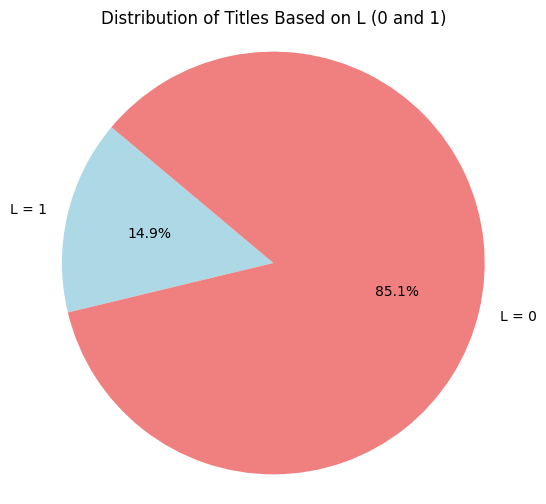

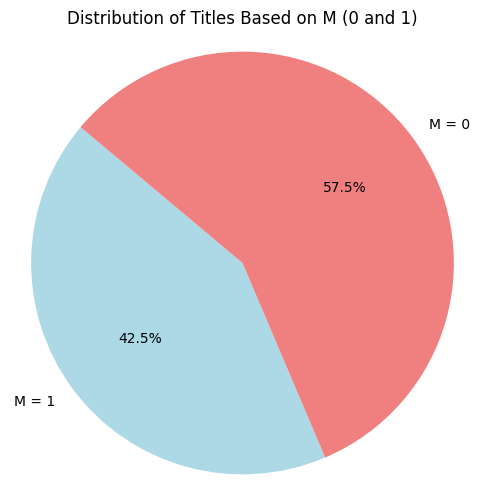

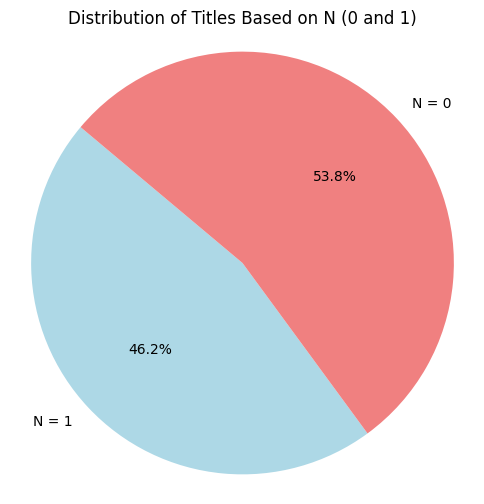

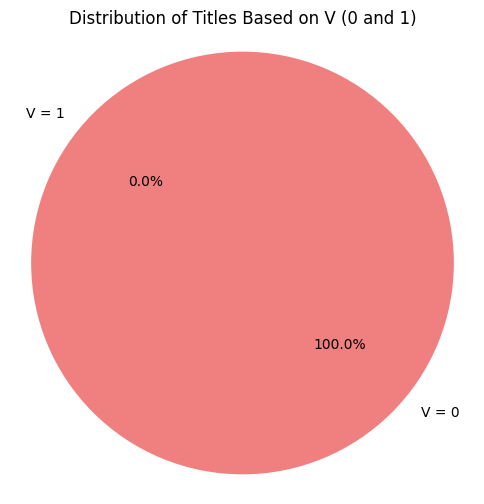

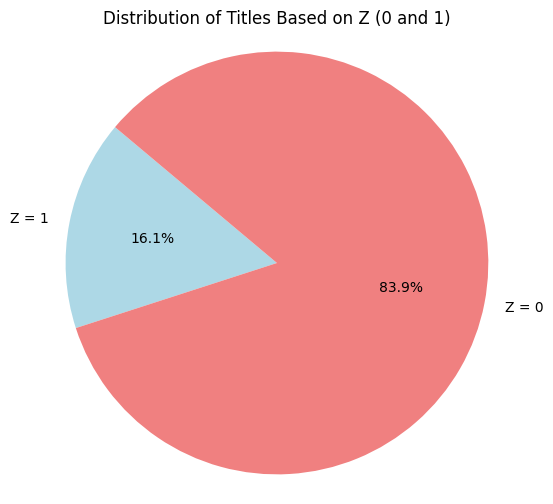

In [5]:

# List of columns to plot
columns = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'V', 'Z']

for col in columns:
    # Group by the current column and count the number of titles
    col_sum = data.groupby(col).count()

    # Safely get the counts of titles where col is 1 and 0
    titles_with_1 = col_sum['Title'].get(1,0) 
    titles_with_0 = col_sum['Title'].get(0,0)  

    # Prepare data for the pie chart
    labels = [f'{col} = 1', f'{col} = 0']
    sizes = [titles_with_1, titles_with_0]
    colors = ['lightblue', 'lightcoral']

    # Validate data
    if all(size == 0 for size in sizes):
        print(f"No data to plot for column {col}.")
    else:
        # Plot the pie chart
        plt.figure(figsize=(6, 6))
        plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)
        plt.title(f'Distribution of Titles Based on {col} (0 and 1)')
        plt.axis('equal')  
        plt.show()


In [6]:
# Drop column 'V'
data = data.drop(columns=['V'])

In [7]:

# Define the columns to check
columns = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'Z']

# Create a mask for rows where all specified columns are 1
all_ones_mask = (data[columns] == 1).all(axis=1)
all_zeros_mask = (data[columns] == 0).all(axis=1)

# Count the rows where all columns are 1
count_all_ones = all_ones_mask.sum()

# Count the rows where all columns are 0
count_all_zeros = all_zeros_mask.sum()

# Print the results
print(f"Count of rows where all columns are 1: {count_all_ones}")
print(f"Count of rows where all columns are 0: {count_all_zeros}")


Count of rows where all columns are 1: 0
Count of rows where all columns are 0: 81


In [8]:
# Define the columns to check
columns = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'Z']

# Create a mask for rows where all specified columns are 0
all_zeros_mask = (data[columns] == 0).all(axis=1)

# Filter the data based on the mask
rows_all_zeros = data[all_zeros_mask]

# Print the relevant columns
print(rows_all_zeros[['Title','abstractText','meshMajor','meshid','meshroot']].head(5))

                                                 Title  \
80               Multiple persistent keratoacanthomas.   
245               [Generalized ceroid-lipofuscinosis].   
331  Archenteron cells are responsible for the incr...   
488  Presenile dementia with motor neuron disease i...   
495  In vitro studies of poison oak immunity. I. In...   

                                          abstractText  \
80   A unique case of multiple keratoacanthomas is ...   
245  A histological verified case of late infantil ...   
331  Paracentrotus lividus embryos were continuousl...   
488  A 61-year-old woman suffered the gradual onset...   
495  Poison oak, ivy, and sumac dermatitis is a T-c...   

                                             meshMajor meshid meshroot  
80   ['Carcinoma, Squamous Cell', 'Diagnosis, Diffe...     []       []  
245  ['Cerebellar Ataxia', 'Child, Preschool', 'Ele...     []       []  
331  ['Animals', 'Blastocyst', 'Ectoderm', 'Embryo,...     []       []  
488  ['Dem

In [9]:
# Drop the rows where all specified columns are 0
data = data[~all_zeros_mask]

In [10]:
# Define the columns to check
columns = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'Z']

# Create a mask for rows where all specified columns are 1
all_ones_mask = (data[columns] == 1).all(axis=1)
all_zeros_mask = (data[columns] == 0).all(axis=1)



# Count the rows where all columns are 1
count_all_ones = all_ones_mask.sum()

# Count the rows where all columns are 0
count_all_zeros = all_zeros_mask.sum()

# Print the results
print(f"Count of rows where all columns are 1: {count_all_ones}")
print(f"Count of rows where all columns are 0: {count_all_zeros}")

Count of rows where all columns are 1: 0
Count of rows where all columns are 0: 0


In [11]:

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.multioutput import MultiOutputClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score, f1_score

def train_and_evaluate_model(data):

    # Combine 'Title' and 'abstractText' into a single text feature
    data['combined_text'] = data['Title'].fillna('') + ' ' + data['abstractText'].fillna('')

    # Convert 'meshMajor', 'meshid', and 'meshroot' from list to space-separated strings
    data['meshMajor_str'] = data['meshMajor'].apply(lambda x: ' '.join(eval(x)) if pd.notnull(x) and isinstance(eval(x), list) else '')
    data['meshid_str'] = data['meshid'].apply(lambda x: ' '.join([' '.join(i) for i in eval(x)]) if pd.notnull(x) and isinstance(eval(x), list) else '')
    data['meshroot_str'] = data['meshroot'].apply(lambda x: ' '.join([' '.join(i) for i in eval(x)]) if pd.notnull(x) and isinstance(eval(x), list) else '')

    # Fill missing values in text fields with empty strings
    data['combined_text'] = data['combined_text'].fillna('')
    data['meshMajor_str'] = data['meshMajor_str'].fillna('')
    data['meshid_str'] = data['meshid_str'].fillna('')
    data['meshroot_str'] = data['meshroot_str'].fillna('')

    # Ensure 'pmid' is numeric and fill missing values with 0
    data['pmid'] = pd.to_numeric(data['pmid'], errors='coerce').fillna(0)

    # Feature columns
    features = ['combined_text', 'meshMajor_str', 'meshid_str', 'pmid', 'meshroot_str']

    # Target columns (multi-label classification)
    targets = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'Z']

    # Extract features and targets
    X = data[features]
    y = data[targets]

    # Initialize the encoders for text features
    text_vectorizers = {
        'combined_text': TfidfVectorizer(max_features=5000, stop_words='english'),
        'meshMajor_str': TfidfVectorizer(max_features=1000, stop_words='english'),
        'meshid_str': TfidfVectorizer(max_features=500, stop_words='english'),
        'meshroot_str': TfidfVectorizer(max_features=500, stop_words='english')
    }

    scaler = StandardScaler()

    # Fit and transform text features
    text_features = []
    for feature, vectorizer in text_vectorizers.items():
        try:
            tfidf_matrix = vectorizer.fit_transform(X[feature])
            text_features.append(tfidf_matrix.toarray())
        except Exception as e:
            print(f"Error processing feature {feature}: {e}")
            text_features.append(np.zeros((X.shape[0], vectorizer.max_features)))

    # Convert 'pmid' to a 2D array and scale
    pmid_reshaped = X[['pmid']].values.reshape(-1, 1)
    pmid_scaled = scaler.fit_transform(pmid_reshaped)

    # Concatenate all features
    text_features = np.hstack(text_features)
    X_transformed = np.hstack([text_features, pmid_scaled])
    print("X_transformed shape: ", X_transformed.shape)

    # Split the data
    X_train, X_test, y_train, y_test = train_test_split(X_transformed, y, test_size=0.3, random_state=42)
    print("X_train shape: ", X_train.shape)
    print("y_train shape: ", y_train.shape)

    # Initialize and train the model
    model = MultiOutputClassifier(RandomForestClassifier(n_estimators=100, random_state=42))
    model.fit(X_train, y_train)

    # Make predictions
    y_pred = model.predict(X_test)

    # Evaluate the model
    classification_rep = classification_report(y_test, y_pred, target_names=targets, output_dict=True)
    accuracy = accuracy_score(y_test, np.round(y_pred))
    f1_micro = f1_score(y_test, y_pred, average='micro')

    # Create evaluation results dictionary
    evaluation_results = {
        "classification_report": classification_rep,
        "accuracy": accuracy,
        "f1_micro": f1_micro
    }

    # Print the results
    print("Model:", model)
    print("\nText Vectorizers:")
    for name, vectorizer in text_vectorizers.items():
        print(f"{name}: {vectorizer.get_params()}")
    print("\nScaler:", scaler)
    print("\nEvaluation Results:")
    print("Accuracy:", evaluation_results['accuracy'])
    print("F1 Score (Micro):", evaluation_results['f1_micro'])
    print("Classification Report:", evaluation_results['classification_report'])

    return model, text_vectorizers, scaler, evaluation_results

def real_time_predict(model, text_vectorizers, scaler, title_input):

    # Create a DataFrame for the input (with empty fields for the unused features)
    input_data = pd.DataFrame({
        'combined_text': [title_input],
        'meshMajor_str': [''],  # Default empty for real-time prediction
        'meshid_str': [''],     # Default empty for real-time prediction
        'meshroot_str': [''],   # Default empty for real-time prediction
        'pmid': [0]             # Default value for 'pmid'
    })

    # Vectorize and transform the text input using the pre-fitted vectorizers
    text_features = []
    for feature, vectorizer in text_vectorizers.items():
        try:
            tfidf_matrix = vectorizer.transform(input_data[feature])
            text_features.append(tfidf_matrix.toarray())
        except Exception as e:
            print(f"Error processing feature {feature}: {e}")
            text_features.append(np.zeros((input_data.shape[0], vectorizer.max_features)))

    # Scale the 'pmid' feature
    pmid_reshaped = input_data[['pmid']].values.reshape(-1, 1)
    pmid_scaled = scaler.transform(pmid_reshaped)

    # Concatenate all transformed features into a single input array
    text_features = np.hstack(text_features)
    input_transformed = np.hstack([text_features, pmid_scaled])

    # Use the trained model to predict the labels for the new input
    prediction = model.predict(input_transformed)

    return prediction

model, text_vectorizers, scaler, evaluation_results = train_and_evaluate_model(data)

# Title input for real-time prediction
title_input = input("Enter the title for prediction: ")

# Call real_time_predict function to get the prediction
prediction = real_time_predict(model, text_vectorizers, scaler, title_input)

# Output the prediction
print("Prediction for the input title:")
print(prediction)

Error processing feature meshroot_str: empty vocabulary; perhaps the documents only contain stop words
X_transformed shape:  (9919, 7001)
X_train shape:  (6943, 7001)
y_train shape:  (6943, 15)
Model: MultiOutputClassifier(estimator=RandomForestClassifier(random_state=42))

Text Vectorizers:
combined_text: {'analyzer': 'word', 'binary': False, 'decode_error': 'strict', 'dtype': <class 'numpy.float64'>, 'encoding': 'utf-8', 'input': 'content', 'lowercase': True, 'max_df': 1.0, 'max_features': 5000, 'min_df': 1, 'ngram_range': (1, 1), 'norm': 'l2', 'preprocessor': None, 'smooth_idf': True, 'stop_words': 'english', 'strip_accents': None, 'sublinear_tf': False, 'token_pattern': '(?u)\\b\\w\\w+\\b', 'tokenizer': None, 'use_idf': True, 'vocabulary': None}
meshMajor_str: {'analyzer': 'word', 'binary': False, 'decode_error': 'strict', 'dtype': <class 'numpy.float64'>, 'encoding': 'utf-8', 'input': 'content', 'lowercase': True, 'max_df': 1.0, 'max_features': 1000, 'min_df': 1, 'ngram_range': (1

Enter the title for prediction:  Expression of p53 and coexistence of HPV in premalignant lesions and in cervical cancer.


Error processing feature meshroot_str: Vocabulary not fitted or provided
Prediction for the input title:
[[0 0 0 1 0 0 1 0 0 0 0 0 0 0 0]]
